In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
# DATA COLLECTION 
tier1_data = '/Users/karanmajotra/Desktop/data analytics(Ajit sir)/Project #3- FedEx/tier1_cities_data.xlsx'
tier2_data = '/Users/karanmajotra/Desktop/data analytics(Ajit sir)/Project #3- FedEx/tier2_cities_data.xlsx'

In [44]:
#LOAD DATA INTO PANDAS DATAFRAMES
tier1_df = pd.read_excel(tier1_data)
tier2_df = pd.read_excel(tier2_data)

In [47]:
# MERGING AND CLEANING FOR DATA ANALYSIS & VISUALIZATION 
tier1_df['Tier'] = 'Tier 1'
tier2_df['Tier'] = 'Tier 2'
combined_df = pd.concat([tier1_df,tier2_df],ignore_index = True)



In [49]:
# DATA CLEANING AND PREPARATION 
# CHECK FOR MISSING VALUES
missing_value = combined_df.isnull().sum()

In [51]:
#print(missing_value)

In [53]:
# CONVERT DATE COLOUMNS TO DATE TIME FORMAT
date_columns = ['Ship Date', 'Promise Date', 'Delivery Date']  # Fixed the typo here
for col in date_columns:
    combined_df[col] = pd.to_datetime(combined_df[col], errors='coerce', dayfirst=True)


In [56]:
# CUSTOM  DELAY DAYS
combined_df['Delay(days)'] = (combined_df['Delivery Date'] - combined_df['Promise Date']).dt.days

In [58]:
# ENSURE NUMERIC COLUMNS ARE PROPERLY FORMATTED
numeric_columns = ['Transit Time (Days)', 'On-Time Delivery Rate (%)', 'Weight (kg)']  # Fixed the typo here
for col in numeric_columns:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')


In [60]:
# ANALYSIS AND VISUALIZATION 


In [63]:
#PIVOT 2: PRODUCT VS AVERAGE ON-TIME DELVIERY RATE


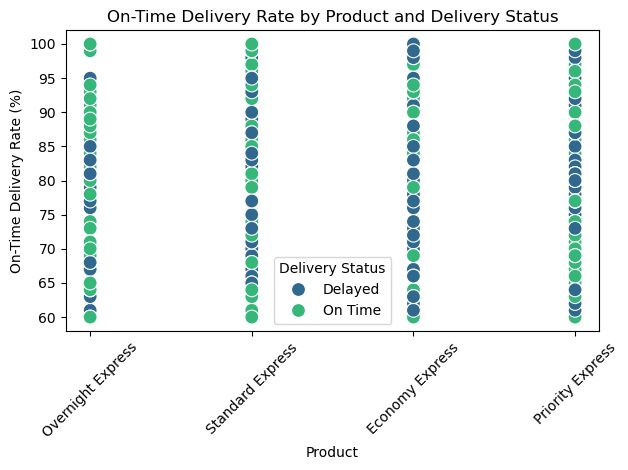

In [65]:
sns.scatterplot(
    data=combined_df, 
    x='Product', 
    y='On-Time Delivery Rate (%)', 
    hue='Delivery Status',  # Third variable encoded by color
    palette='viridis',      # Color palette for better distinction
    s=100,                  # Size of points for better visibility
)

plt.title('On-Time Delivery Rate by Product and Delivery Status')
plt.xlabel('Product')
plt.ylabel('On-Time Delivery Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


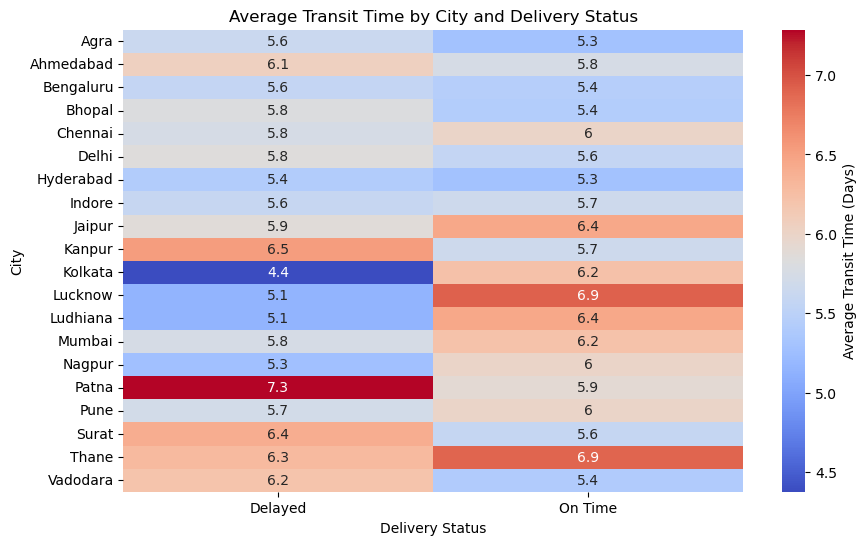

In [70]:
city_transit_status = combined_df.pivot_table(index='City', columns='Delivery Status', values='Transit Time (Days)', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(city_transit_status, annot=True, cmap="coolwarm", cbar_kws={'label': 'Average Transit Time (Days)'})
plt.title('Average Transit Time by City and Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('City')
plt.show()

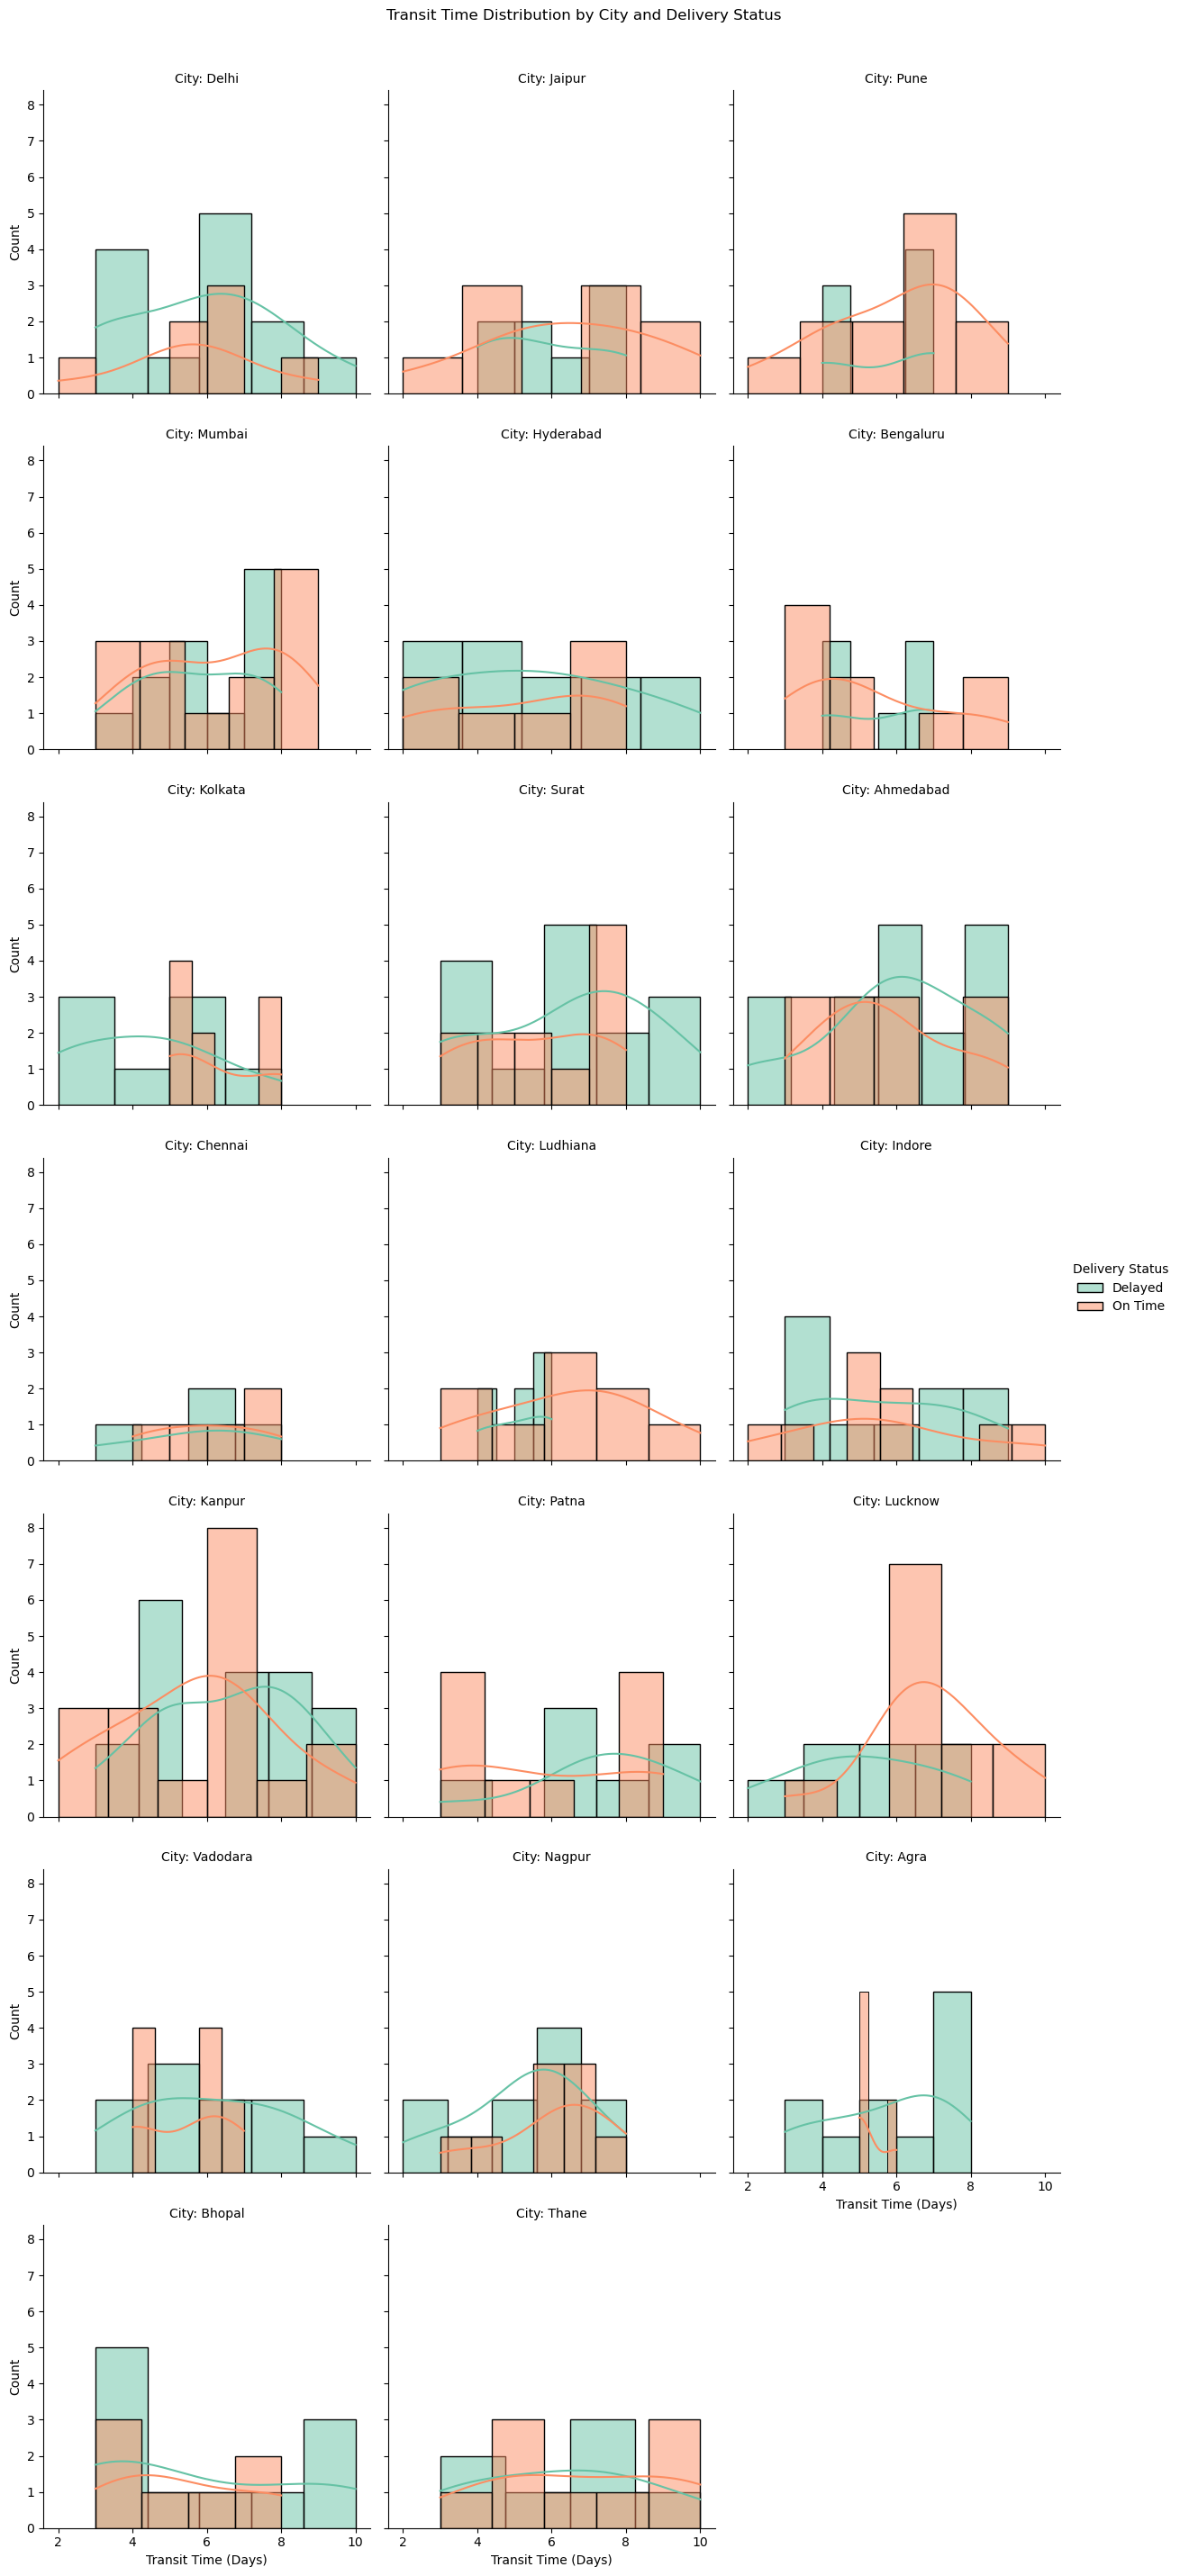

In [71]:
# FacetGrid for visualizing distributions
g = sns.FacetGrid(combined_df, col="City", hue="Delivery Status", col_wrap=3, height=4, palette="Set2")
g.map(sns.histplot, "Transit Time (Days)", kde=True)
g.add_legend()
g.set_axis_labels("Transit Time (Days)", "Count")
g.set_titles("City: {col_name}")
plt.suptitle("Transit Time Distribution by City and Delivery Status", y=1.02)
plt.show()
